### MINMAX + PCA

In [1]:
import pandas as pd 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score, accuracy_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("x_train_minmax_pca_97.csv") 
y_train = df['class']
X_train = df.drop(['class'], axis = 1)
df_test = pd.read_csv("x_test_minmax_pca_97.csv") 
y_test = df_test['class']
X_test = df_test.drop(['class'], axis = 1)

In [3]:
pd.set_option("max_columns", 15)
df

,0,1,2,3,4,5,6,...,790,791,792,793,794,795,class
0,-14.922464,5.033443,-4.291428,-5.377909,-2.673974,-0.442076,-3.178778,...,0.080153,0.143525,0.184311,0.142441,-0.486882,0.500702,0
1,1.227210,6.855914,3.284829,2.134742,-4.173556,-0.131871,-0.176243,...,0.092863,-0.090462,-0.173765,0.010208,0.048242,-0.009578,0
2,-10.466131,3.801826,-0.076059,-0.142212,-6.795634,0.693070,0.587115,...,0.153429,-0.039235,-0.076902,-0.103526,-0.093604,0.104499,0
3,-0.291550,0.134163,2.101741,-0.276473,-4.555051,-2.997156,0.187179,...,-0.098393,-0.046519,0.212531,0.522568,0.106917,0.328793,0
4,-7.083975,-3.525638,4.054232,0.288740,4.363773,-6.333950,0.444656,...,-0.056845,0.165073,-0.036822,-0.152718,0.023589,-0.071052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,16.243427,1.164604,6.203519,1.043491,-4.654441,1.694157,-1.428514,...,-0.017741,-0.079990,0.119614,0.035200,-0.058562,0.016073,2
3485,-11.231110,3.368416,1.495940,9.340180,6.275326,1.532026,-3.587100,...,-0.038051,-0.022786,-0.068932,-0.083994,-0.124310,0.116441,2
3486,-3.506366,3.136393,1.696787,8.290785,6.275972,-2.576262,-1.952776,...,0.159753,-0.037254,0.034715,0.030747,-0.055056,-0.232813,2
3487,9.544817,-0.677706,3.601819,1.810476,2.907359,-1.686533,-2.439230,...,-0.123835,0.103740,-0.189402,-0.178245,0.371590,-0.312255,2


### Logistic Regression

In [2]:
# class_weight=’balanced’, The “balanced” mode uses the values of y to automatically adjust weights inversely 
# proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
# multi_class='multinomial'
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss
# C: Inverse of regularization strength; must be a positive float. 
# larger c, smaller penality

grid_values = {'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 6, 8, 10, 20, 50, 100, 400, 800, 1000],
               'solver': ['lbfgs'],
              'multi_class': ['multinomial'],
              'penalty': ['l2'],
               'max_iter': [10000],
              'class_weight': ['balanced']}
log = LogisticRegression()
log_minmax = GridSearchCV(log, param_grid = grid_values, scoring = 'f1_macro', cv=5, verbose=1)
log_minmax.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 6, 8, 10, 20, 50,
                               100, 400, 800, 1000],
                         'class_weight': ['balanced'], 'max_iter': [10000],
                         'multi_class': ['multinomial'], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1_macro', verbose=1)

In [3]:
result_log_minmax = pd.DataFrame(log_minmax.cv_results_)
result_log_minmax.sort_values(by=['mean_test_score'],ascending=False).head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,param_multi_class,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.874532,0.094727,0.007510,0.000318,0.1,balanced,10000,multinomial,l2,lbfgs,"{'C': 0.1, 'class_weight': 'balanced', 'max_it...",0.743873,0.745102,0.743375,0.749048,0.745037,0.745287,0.001995,1
1,0.299189,0.007479,0.005989,0.000149,0.01,balanced,10000,multinomial,l2,lbfgs,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.751034,0.737750,0.735479,0.753553,0.744834,0.744530,0.007095,2
0,0.176211,0.011545,0.006159,0.000412,0.001,balanced,10000,multinomial,l2,lbfgs,"{'C': 0.001, 'class_weight': 'balanced', 'max_...",0.718279,0.728942,0.715922,0.723884,0.715806,0.720567,0.005111,3
3,2.011592,0.080027,0.006770,0.000840,1,balanced,10000,multinomial,l2,lbfgs,"{'C': 1, 'class_weight': 'balanced', 'max_iter...",0.716226,0.700186,0.704788,0.735524,0.733005,0.717946,0.014334,4
4,2.344882,0.122332,0.007403,0.001163,1.5,balanced,10000,multinomial,l2,lbfgs,"{'C': 1.5, 'class_weight': 'balanced', 'max_it...",0.710495,0.696919,0.702569,0.731419,0.727509,0.713782,0.013568,5


In [65]:
# Compare the best regularized model and non-regularized model
grid_values = {'C': [0.1],
               'solver': ['lbfgs'],
              'multi_class': ['multinomial'],
              'penalty': ['l2', 'none'],
               'max_iter': [10000],
              'class_weight': ['balanced']}
log = LogisticRegression()
log_minmax = GridSearchCV(log, param_grid = grid_values, scoring = 'f1_macro', cv=5, verbose=1)
log_minmax.fit(X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/selina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/selina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/selina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/selina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/selina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1], 'class_weight': ['balanced'],
                         'max_iter': [10000], 'multi_class': ['multinomial'],
                         'penalty': ['l2', 'none'], 'solver': ['lbfgs']},
             scoring='f1_macro', verbose=1)

In [66]:
result_log_minmax = pd.DataFrame(log_minmax.cv_results_)
result_log_minmax.sort_values(by=['mean_test_score'],ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,...,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.823369,0.187925,0.007998,0.004005,0.1,...,0.749048,0.745037,0.745287,0.001995,1
1,1.166211,0.119159,0.006663,0.000659,0.1,...,0.704523,0.681249,0.685423,0.015458,2


In [67]:
log_minmax_pred = log_minmax.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, log_minmax_pred)

print ("Confusion Matrix For MinMax + Logistic Regression: \n", cm)
print(classification_report(y_test, log_minmax_pred, target_names=['happy', 'sad', 'angry']))

Confusion Matrix For MinMax + Logistic Regression: 
 [[26 14  0]
 [10 30  0]
 [ 0  0 32]]
              precision    recall  f1-score   support

       happy       0.72      0.65      0.68        40
         sad       0.68      0.75      0.71        40
       angry       1.00      1.00      1.00        32

    accuracy                           0.79       112
   macro avg       0.80      0.80      0.80       112
weighted avg       0.79      0.79      0.79       112



In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, log_minmax_pred)

0.7857142857142857

### ROC Curve

In [78]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

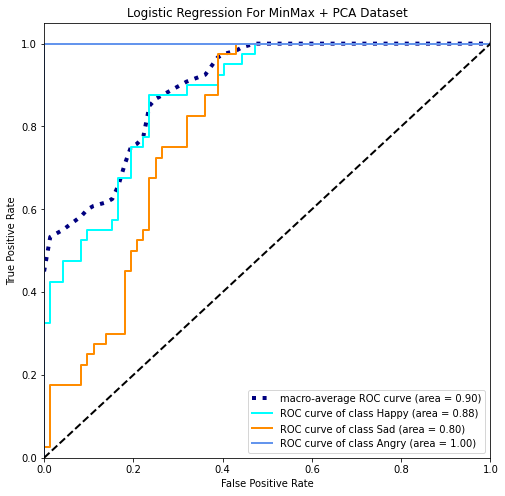

In [120]:
# Binarize the output
y_train1 = label_binarize(y_train, classes=[0, 1, 2])
y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = 3
y_score = log_minmax.best_estimator_.decision_function(X_test)
# Compute ROC curve and ROC area for each class
lw = 2
n_class = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 8))

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
classes = ['Happy', 'Sad', 'Angry']
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression For MinMax + PCA Dataset")
plt.legend(loc="lower right")
plt.show()

### Gaussian NB

In [8]:
# var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account
# for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers 
# spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num =1000)
}

nb_minmax = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=5, scoring = 'f1_macro')
nb_minmax.fit(X_train, y_train)

result_nb_minmax = pd.DataFrame(nb_minmax.cv_results_)
result_nb_minmax.sort_values(by=['mean_test_score'],ascending=False)
result_nb_minmax[['params', 'mean_test_score']].head(5)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


,params,mean_test_score
0,{'var_smoothing': 1.0},0.514726
1,{'var_smoothing': 0.9794696670695393},0.515019
2,{'var_smoothing': 0.9593608287093143},0.514286
3,{'var_smoothing': 0.9396648314954694},0.514325
4,{'var_smoothing': 0.9203731996618223},0.514760


In [9]:
nb_minmax_pred = nb_minmax.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, nb_minmax_pred)

print ("Confusion Matrix For MinMax + Gaussian NB: \n", cm)
print(classification_report(y_test, nb_minmax_pred, target_names=['happy', 'sad', 'angry']))

Confusion Matrix For MinMax + Gaussian NB: 
 [[22 17  1]
 [13 26  1]
 [ 7  7 18]]
              precision    recall  f1-score   support

       happy       0.52      0.55      0.54        40
         sad       0.52      0.65      0.58        40
       angry       0.90      0.56      0.69        32

    accuracy                           0.59       112
   macro avg       0.65      0.59      0.60       112
weighted avg       0.63      0.59      0.60       112



In [10]:
accuracy_score(y_test, nb_minmax_pred)


0.5892857142857143

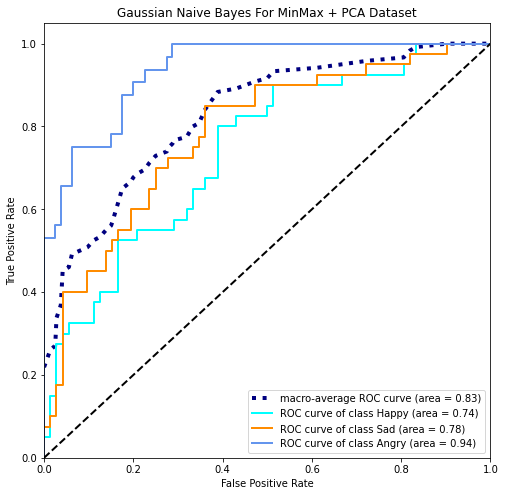

In [121]:
# Binarize the output
n_classes = 3
y_score = nb_minmax.best_estimator_.predict_proba(X_test)
# Compute ROC curve and ROC area for each class
lw = 2
n_class = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 8))

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
classes = ['Happy', 'Sad', 'Angry']
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gaussian Naive Bayes For MinMax + PCA Dataset")
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'random_state': [42]}

            
dtc = DecisionTreeClassifier()
dtc_minmax = GridSearchCV(dtc, param_grid = grid_values, scoring = 'f1_macro', cv=5, verbose=1) 
dtc_minmax.fit(X_train, y_train)

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.020...
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'random_state': [42]},
             scoring='f1_macro', verb

In [58]:
result_dtc_minmax = pd.DataFrame(dtc_minmax.cv_results_)
result_dtc_minmax.sort_values(by=['mean_test_score'],ascending=False)
result_dtc_minmax[['params', 'mean_test_score']].head(5)

,params,mean_test_score
0,"{'ccp_alpha': 0.0, 'random_state': 42}",0.564099
1,"{'ccp_alpha': 0.0005, 'random_state': 42}",0.564025
2,"{'ccp_alpha': 0.001, 'random_state': 42}",0.572293
3,"{'ccp_alpha': 0.0015, 'random_state': 42}",0.571598
4,"{'ccp_alpha': 0.002, 'random_state': 42}",0.575983


In [59]:
dtc_minmax_pred = dtc_minmax.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, dtc_minmax_pred)

print ("Confusion Matrix For MinMax + Decision Tree: \n", cm)
print(classification_report(y_test, dtc_minmax_pred, target_names=['happy', 'sad', 'angry']))


Confusion Matrix For MinMax + Decision Tree: 
 [[15 15 10]
 [13 23  4]
 [ 5  8 19]]
              precision    recall  f1-score   support

       happy       0.45      0.38      0.41        40
         sad       0.50      0.57      0.53        40
       angry       0.58      0.59      0.58        32

    accuracy                           0.51       112
   macro avg       0.51      0.51      0.51       112
weighted avg       0.51      0.51      0.50       112



In [60]:
accuracy_score(y_test, dtc_minmax_pred)

0.5089285714285714

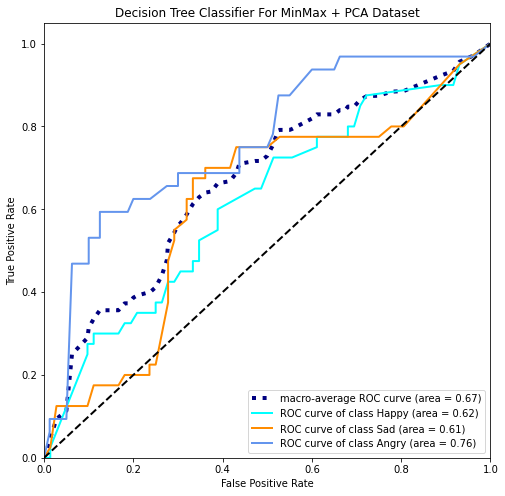

In [122]:
# Binarize the output
n_classes = 3
y_score = dtc_minmax.best_estimator_.predict_proba(X_test)
# Compute ROC curve and ROC area for each class
lw = 2
n_class = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 8))

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
classes = ['Happy', 'Sad', 'Angry']
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Classifier For MinMax + PCA Dataset")
plt.legend(loc="lower right")
plt.show()

### Ensemble Model

In [127]:
import time
# get the start time
st = time.time()

en_minmax = pd.DataFrame()
en_minmax['logistic Regression'] = log_minmax_pred
en_minmax['naive bayes'] = nb_minmax_pred
en_minmax['Decision Tree'] = dtc_minmax_pred

en_minmax
# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 0.0340418815612793 seconds


In [128]:
import time
st = time.process_time()
en_minmax = pd.DataFrame()
en_minmax['logistic Regression'] = log_minmax_pred
en_minmax['naive bayes'] = nb_minmax_pred
en_minmax['Decision Tree'] = dtc_minmax_pred

en_minmax
# get the end time
et = time.process_time()

# get execution time
res = et - st
print('CPU Execution time:', res, 'seconds')

CPU Execution time: 0.0035349999998288695 seconds


In [18]:
en_minmax = pd.DataFrame()
en_minmax['logistic Regression'] = log_minmax_pred
en_minmax['naive bayes'] = nb_minmax_pred
en_minmax['Decision Tree'] = dtc_minmax_pred

en_minmax

,logistic Regression,naive bayes,Decision Tree
0,0,1,2
1,0,1,0
2,0,1,1
3,0,0,2
4,0,0,0
...,...,...,...
107,2,2,1
108,2,2,1
109,2,0,2
110,2,2,2


In [26]:
en_minmax_pred = en_minmax.mode(axis='columns').iloc[:, 0]
cm = confusion_matrix(y_test, en_minmax_pred)

print ("Confusion Matrix For MinMax + Ensemble: \n", cm)
print(classification_report(y_test, en_minmax_pred, target_names=['happy', 'sad', 'angry']))

Confusion Matrix For MinMax + Ensemble: 
 [[30 10  0]
 [12 28  0]
 [ 4  3 25]]
              precision    recall  f1-score   support

       happy       0.65      0.75      0.70        40
         sad       0.68      0.70      0.69        40
       angry       1.00      0.78      0.88        32

    accuracy                           0.74       112
   macro avg       0.78      0.74      0.76       112
weighted avg       0.76      0.74      0.75       112



In [27]:
accuracy_score(y_test, en_minmax_pred)

0.7410714285714286

### Standard Normalization + PCA
### logistic regression


In [31]:
df_sc = pd.read_csv("x_train_sc_pca_97.csv") 
y_sc_train = df_sc['class']
X_sc_train = df_sc.drop(['class'], axis = 1)
df_sc_test = pd.read_csv("x_test_sc_pca_97.csv") 
y_sc_test = df_sc_test['class']
X_sc_test = df_sc_test.drop(['class'], axis = 1)


In [32]:
pd.set_option("max_columns", 10)
pd.set_option("max_rows", 6)
df_sc_test

,0,1,2,3,4,...,818,819,820,821,class
0,-7.724222,43.702136,-8.733438,-18.413934,-4.172738,...,-0.324779,0.600665,-0.135713,-0.283232,0
1,3.278755,46.345452,-8.714898,-6.171662,-10.362246,...,-0.059931,0.302256,0.883764,-0.200326,0
2,73.688649,22.888624,-4.408990,19.304803,14.994245,...,0.016746,-0.371382,0.056661,0.014483,0
...,...,...,...,...,...,...,...,...,...,...,...
109,-58.048963,2.991186,13.923840,-3.877659,8.519540,...,1.166759,-0.267535,-0.352912,0.258270,2
110,-1.896902,96.970440,-36.630747,23.175053,0.000823,...,-0.418050,-0.051926,0.457535,-0.718437,2
111,-39.331068,-14.513726,-6.902976,26.419090,-0.986210,...,-0.419198,-0.287850,0.752592,0.958320,2


In [33]:
grid_values = {'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 6, 8, 10, 20, 50, 100, 400, 800, 1000],
               'solver': ['lbfgs'],
              'multi_class': ['multinomial'],
              'penalty': ['l2'],
               'max_iter': [10000],
              'class_weight': ['balanced']}
log_sc = LogisticRegression()
log_sc = GridSearchCV(log_sc, param_grid = grid_values, scoring = 'f1_macro', cv=5, verbose=1)
log_sc.fit(X_sc_train, y_sc_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 6, 8, 10, 20, 50,
                               100, 400, 800, 1000],
                         'class_weight': ['balanced'], 'max_iter': [10000],
                         'multi_class': ['multinomial'], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1_macro', verbose=1)

In [34]:
result_log_sc = pd.DataFrame(log_sc.cv_results_)
result_log_sc.sort_values(by=['mean_test_score'],ascending=False)
result_log_sc[['params', 'mean_test_score']].head(2)

,params,mean_test_score
0,"{'C': 0.001, 'class_weight': 'balanced', 'max_...",0.752255
1,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.741837


In [35]:
# Compare the best regularized model and non-regularized model
grid_values = {'C': [0.001],
               'solver': ['lbfgs'],
              'multi_class': ['multinomial'],
              'penalty': ['l2', 'none'],
               'max_iter': [10000],
              'class_weight': ['balanced']}
log = LogisticRegression()
log_sc = GridSearchCV(log, param_grid = grid_values, cv=5, verbose=1, scoring = 'f1_macro')
log_sc.fit(X_sc_train, y_sc_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/selina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/selina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/selina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/selina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/selina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001], 'class_weight': ['balanced'],
                         'max_iter': [10000], 'multi_class': ['multinomial'],
                         'penalty': ['l2', 'none'], 'solver': ['lbfgs']},
             scoring='f1_macro', verbose=1)

In [36]:
log_sc_pred = log_sc.best_estimator_.predict(X_sc_test)
cm = confusion_matrix(y_sc_test, log_sc_pred)

print ("Confusion Matrix Standardization + Logistic Regression: \n", cm)
print(classification_report(y_sc_test, log_sc_pred, target_names=['happy', 'sad', 'angry']))

Confusion Matrix Standardization + Logistic Regression: 
 [[28 12  0]
 [ 8 32  0]
 [ 0  0 32]]
              precision    recall  f1-score   support

       happy       0.78      0.70      0.74        40
         sad       0.73      0.80      0.76        40
       angry       1.00      1.00      1.00        32

    accuracy                           0.82       112
   macro avg       0.84      0.83      0.83       112
weighted avg       0.82      0.82      0.82       112



In [37]:
accuracy_score(y_sc_test, log_sc_pred)


0.8214285714285714

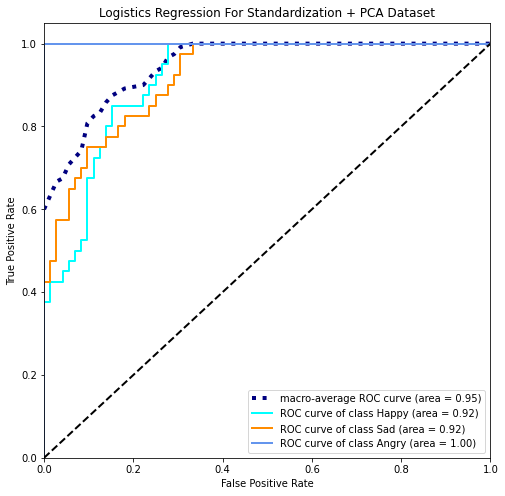

In [123]:
# Binarize the output
n_classes = 3
y_score = log_sc.best_estimator_.predict_proba(X_sc_test)
# Compute ROC curve and ROC area for each class
lw = 2
n_class = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 8))

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
classes = ['Happy', 'Sad', 'Angry']
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistics Regression For Standardization + PCA Dataset")
plt.legend(loc="lower right")
plt.show()

### Gaussian NB

In [38]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num =1000)
}

nb_sc = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=5, scoring = 'f1_macro')
nb_sc.fit(X_sc_train, y_sc_train)

result_nb_sc = pd.DataFrame(nb_sc.cv_results_)
result_nb_sc.sort_values(by=['mean_test_score'],ascending=False)
result_nb_sc[['params', 'mean_test_score']].head(5)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


,params,mean_test_score
0,{'var_smoothing': 1.0},0.496663
1,{'var_smoothing': 0.9794696670695393},0.497123
2,{'var_smoothing': 0.9593608287093143},0.497123
3,{'var_smoothing': 0.9396648314954694},0.496710
4,{'var_smoothing': 0.9203731996618223},0.496480


In [39]:
nb_sc_pred = nb_sc.best_estimator_.predict(X_sc_test)
cm = confusion_matrix(y_sc_test, nb_sc_pred)

print ("Confusion Matrix Standardization + Gaussian NB: \n", cm)
print(classification_report(y_sc_test, nb_sc_pred, target_names=['happy', 'sad', 'angry']))

Confusion Matrix Standardization + Gaussian NB: 
 [[ 8 28  4]
 [ 1 38  1]
 [ 0 16 16]]
              precision    recall  f1-score   support

       happy       0.89      0.20      0.33        40
         sad       0.46      0.95      0.62        40
       angry       0.76      0.50      0.60        32

    accuracy                           0.55       112
   macro avg       0.70      0.55      0.52       112
weighted avg       0.70      0.55      0.51       112



In [40]:
accuracy_score(y_sc_test, nb_sc_pred)


0.5535714285714286

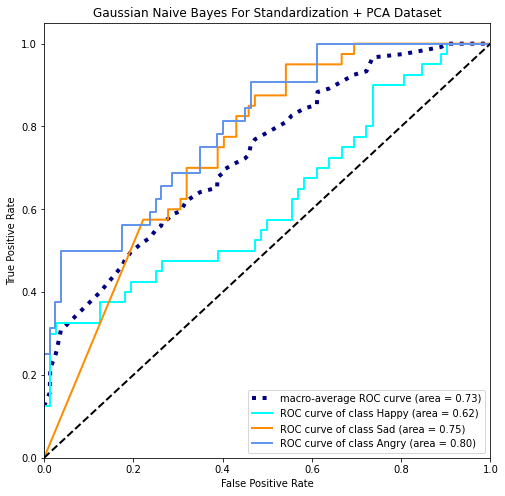

In [124]:
# Binarize the output
n_classes = 3
y_score = nb_sc.best_estimator_.predict_proba(X_sc_test)
# Compute ROC curve and ROC area for each class
lw = 2
n_class = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 8))

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
classes = ['Happy', 'Sad', 'Angry']
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gaussian Naive Bayes For Standardization + PCA Dataset")
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [53]:
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'random_state': [42]}

            
dtc = DecisionTreeClassifier()
dtc_sc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'f1_macro', cv=5, verbose=1) 
dtc_sc.fit(X_sc_train, y_sc_train)

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.020...
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'random_state': [42]},
             scoring='f1_macro', verb

In [54]:
result_dtc_sc = pd.DataFrame(dtc_sc.cv_results_)
result_dtc_sc.sort_values(by=['mean_test_score'],ascending=False)
result_dtc_sc[['params', 'mean_test_score']].head(5)

,params,mean_test_score
0,"{'ccp_alpha': 0.0, 'random_state': 42}",0.583901
1,"{'ccp_alpha': 0.0005, 'random_state': 42}",0.583599
2,"{'ccp_alpha': 0.001, 'random_state': 42}",0.587887
3,"{'ccp_alpha': 0.0015, 'random_state': 42}",0.594665
4,"{'ccp_alpha': 0.002, 'random_state': 42}",0.596543


In [55]:
dtc_sc_pred = dtc_sc.best_estimator_.predict(X_sc_test)
cm = confusion_matrix(y_sc_test, dtc_sc_pred)

print ("Confusion Matrix For Standardization + Decision Tree: \n", cm)
print(classification_report(y_sc_test, dtc_sc_pred, target_names=['happy', 'sad', 'angry']))

Confusion Matrix For Standardization + Decision Tree: 
 [[19 16  5]
 [14 21  5]
 [ 3  2 27]]
              precision    recall  f1-score   support

       happy       0.53      0.47      0.50        40
         sad       0.54      0.53      0.53        40
       angry       0.73      0.84      0.78        32

    accuracy                           0.60       112
   macro avg       0.60      0.61      0.60       112
weighted avg       0.59      0.60      0.59       112



In [56]:
accuracy_score(y_sc_test, dtc_sc_pred)

0.5982142857142857

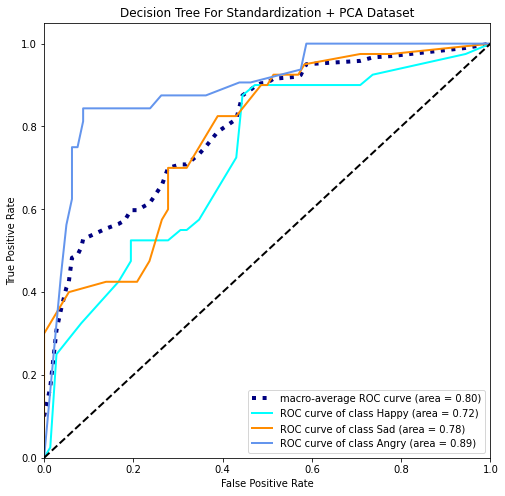

In [125]:
# Binarize the output
n_classes = 3
y_score = dtc_sc.best_estimator_.predict_proba(X_sc_test)
# Compute ROC curve and ROC area for each class
lw = 2
n_class = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 8))

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
classes = ['Happy', 'Sad', 'Angry']
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree For Standardization + PCA Dataset")
plt.legend(loc="lower right")
plt.show()

### Ensemble Model

In [46]:
en_sc = pd.DataFrame()
en_sc['logistic Regression'] = log_sc_pred
en_sc['naive bayes'] = nb_sc_pred
en_sc['Decision Tree'] = dtc_sc_pred
en_sc

,logistic Regression,naive bayes,Decision Tree
0,0,2,1
1,0,1,1
2,0,1,1
...,...,...,...
109,2,2,0
110,2,1,2
111,2,2,2


In [47]:
en_sc_pred = en_sc.mode(axis='columns').iloc[:, 0]
cm = confusion_matrix(y_sc_test, en_sc_pred)

print ("Confusion Matrix For MinMax + Ensemble: \n", cm)
print(classification_report(y_sc_test, en_sc_pred, target_names=['happy', 'sad', 'angry']))

Confusion Matrix For MinMax + Ensemble: 
 [[26 14  0]
 [ 7 33  0]
 [ 3  1 28]]
              precision    recall  f1-score   support

       happy       0.72      0.65      0.68        40
         sad       0.69      0.82      0.75        40
       angry       1.00      0.88      0.93        32

    accuracy                           0.78       112
   macro avg       0.80      0.78      0.79       112
weighted avg       0.79      0.78      0.78       112



In [48]:
accuracy_score(y_sc_test, en_sc_pred)

0.7767857142857143

# Time for Each Model

In [ ]:
import time
start = time.time()
model.fit(X, y)
stop = time.time()
print(f"Training time: {stop - start}s")

In [ ]:
start = time.time()
model.fit(X, y)
stop = time.time()
print(f"Training time: {stop - start}s")

In [ ]:
start = time.time()
model.fit(X, y)
stop = time.time()
print(f"Training time: {stop - start}s")

In [ ]:
start = time.time()
model.fit(X, y)
stop = time.time()
print(f"Training time: {stop - start}s")

In [ ]:
start = time.time()
model.fit(X, y)
stop = time.time()
print(f"Training time: {stop - start}s")

In [ ]:
start = time.time()
model.fit(X, y)
stop = time.time()
print(f"Training time: {stop - start}s")

# Space complexity

In [ ]:
from memory_profiler import profile